In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## 설정 변수 정의

# 이미지 리스트(npy)
image_list = np.load("/src/hyebin/deeplab_v3/train_data_256.npy", allow_pickle=True)
image_list = np.squeeze(image_list, axis=3)

# 행(x)
row = 3
# 열(y)
col = 3

In [3]:
print(image_list.shape)

(537, 256, 256)


이미지리스트를 조건(x개수, y개수)에 따라 합침

이미지의 총 개수가 6개이고,<br>
x개수가 2, y개수가 3이면,

image1, image2<br>
image3, image4<br>
image5, image6<br>
의 형태로 합친 후 결과를 반환

※ 파라미터 체크 사항<br>
1.이미지리스트는 null이면 null로 리턴<br>
2.x개수가 0 이하이면, 예외발생<br>
3.y개수가 0 이하이면, 예외발생<br>
4.이미지리스트의 이미지 총개수 = x개수 * y개수<br>
5.처음 파라미터에서 이미지리스트 타입 체크<br>
npy인지, 일반 배열인지, 둘다 아니면 return<br>
일반 배열이면 npy로 바꾸는 작업 필요

In [4]:
def convergeImages(image_list, row, col):
       
    converge_image = []
       
    # 1. image_list == null, null return
    if image_list is None:
        print("Image list is null")
        return None
    
    # 2. row < 0 || col < 0, exception
    if row < 0 or col < 0:
        print("zero")
        return 
    
    # 3. image type check
    if isinstance(image_list, list):
        image_list = np.array(image_list)
    
    # 3-1. image type !== list || numpy, return
#     if type(image_list) !== list or type(image_list) !== numpy:
#         print("X")
#         return
                
    ## converge
    base_index = 0
    image_list = image_list[base_index:base_index + (row*col)]
    print(image_list.shape)
    
    # 변수 할당
    img_arr = []
    for i in range(row*col):
        globals()['img{}'.format(i)] = image_list[i:i+1]  
        #img_arr.append(image_list[i:i+1])
        
#     for i in range(3):
#         tmps = 'img' + '%d' %i
#         print(eval(tmps))

    # 열(col) 합치기
    for i in range(1):
        img1 = 'img' + '%d' %i
        #i = i + 1
        img2 = 'img' + '%d' %i
        print('img1',type(eval(img1)))
        print('img2',type(eval(img2)))
        converge_image1 = np.concatenate((eval(img1), eval(img2)), axis=2)
#         if col > 2:
#             for y in range(col-2):
#                 y = y + 2
#                 converge_image1 = np.concatenate((converge_image1, img_arr[y]), axis=2)
    
#     converge_image2 = np.concatenate((img_arr[col], img_arr[col+1]), axis=2)
#     for y in range(col-2):
#         y = col + 2
#         print(y)
#         converge_image2 = np.concatenate((converge_image2, img_arr[y]), axis=2)
        
    #converge_image = np.concatenate((converge_image1,converge_image2), axis=1)
                
    # (1, 256*2, 256*3) 형태가 되야함
#     converge_image1 = np.concatenate((img0,img1), axis=2) # axis=1(row), 2(column)
#     print(converge_image1.shape)
    
#     converge_image2 = np.concatenate((img2,img3), axis=2)
#     converge_image2 = np.concatenate((converge_image1,converge_image2), axis=1)
#     print(converge_image2.shape)
    
#     converge_image3 = np.concatenate((img4,img5), axis=2)
#     converge_image3 = np.concatenate((converge_image2,converge_image3), axis=1)
#     print(converge_image3.shape)
        
    print("\nImage total count:", row * col)
    
    return converge_image1

In [5]:
result = convergeImages(image_list, row, col)

(9, 256, 256)
img1 <class 'numpy.ndarray'>
img2 <class 'numpy.ndarray'>

Image total count: 9


In [6]:
## --- 이미지 출력 함수 ---
def show_image(img):
    
    # pyplot의 현재 전체 이미지 크기를 백업 후 설정함
    tmp_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = (10, 8)  # 너비, 높이 (in)

    # 원본 이미지 출력
    plt.subplot(1, 1, 1)
    plt.imshow(img, cmap='gray')

    plt.show()
    plt.close()

    # 백업된 pyplot 이미지 크기를 복원함
    plt.rcParams["figure.figsize"] = tmp_size

(1, 256, 512)


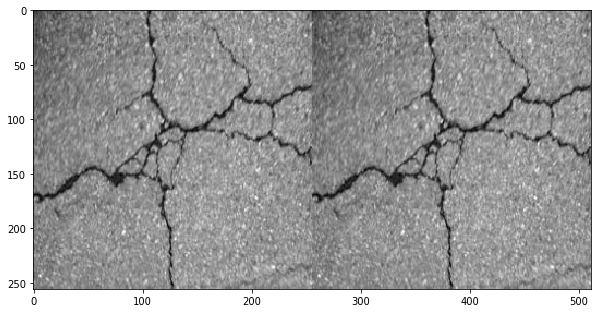

In [7]:
print(result.shape)
_img = []
for i in range(len(result)):
    _img.append(result[i])

for i in range(len(_img)):
    show_image(_img[i])